# Develop `time_series_plots` Figure Module

Development of functions for `nowcast.figures.research.time_series_plots` web site figure module.

In [1]:
from types import SimpleNamespace

import matplotlib.pyplot as plt
import xarray as xr

from salishsea_tools import places

import nowcast
import nowcast.figures.website_theme

from importlib import reload

/home/sallen/anaconda/envs/nowcast-fig-dev/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
%matplotlib inline

What make_plots provides:

In [3]:
time_slice = slice('2014-10-12 12:00:00', '2014-12-15 12:00:00', 6)

place = 'Sandheads'

left_variable = 'nitrate'
right_variable = 'silicon'

xr_dataset = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV17-02')

## `_prep_plot_data()` Function

In [4]:
def _prep_plot_data(xr_dataset, left_variable, right_variable, place,
                    time_slice):

    gridY = places.PLACES[place]['NEMO grid ji'][0]
    gridX = places.PLACES[place]['NEMO grid ji'][1]

    left = xr_dataset[left_variable].sel(time=time_slice).isel(depth=0).isel(
        gridX=gridX).isel(gridY=gridY)
    
    right = xr_dataset[right_variable].sel(time=time_slice).isel(depth=0).isel(
        gridX=gridX).isel(gridY=gridY)

    return SimpleNamespace(left=left, right=right)

## `_prep_fig_axes() Function`

In [5]:
def _prep_fig_axes(figsize, theme):
    fig, axl = plt.subplots(
        figsize=figsize, facecolor=theme.COLOURS['figure']['facecolor'])

    axl.set_axis_bgcolor(theme.COLOURS['axes']['background'])
    axr = axl.twinx()
    axr.set_axis_bgcolor(theme.COLOURS['axes']['background'])
    
    return fig, axl, axr

## `_plot_timeseries()` Function

In [6]:
def _plot_timeseries(ax, plot_data, variable, theme):
    ax.plot(plot_data.time, plot_data, color=theme.COLOURS['time series'][variable])
    return

## `_timeseries_axes_labels()` Function

In [7]:
def _timeseries_axes_labels(axl, axr, left_variable, right_variable, theme):
    axl.set_xlabel(
        'Date',
        color=theme.COLOURS['text']['axis'],
        fontproperties=theme.FONTS['axis'])
    axl.set_ylabel(left_variable, fontproperties=theme.FONTS['axis'])
    theme.set_axis_colors(axl)
    axr.set_ylabel(right_variable, fontproperties=theme.FONTS['axis'])
    theme.set_axis_colors(axr)

    axl.text(
        0.5,
        0.95,
        left_variable,
        horizontalalignment='center',
        color=theme.COLOURS['time series'][left_variable],
        fontproperties=theme.FONTS['legend label large'],
        transform=axl.transAxes)
    axl.text(
        0.5,
        0.9,
        right_variable,
        horizontalalignment='center',
        color=theme.COLOURS['time series'][right_variable],
        fontproperties=theme.FONTS['legend label large'],
        transform=axl.transAxes)
    
    axl.grid(axis='x')

## `make_figure()` Function

This is is the function that will be called by the `nowcast.workers.make_plots` worker to return a `matplotlib.figure.Figure` object.

In [8]:
def make_figure(xr_dataset,
                left_variable,
                right_variable,
                time_slice,
                place,
                figsize=(20, 8),
                theme=nowcast.figures.website_theme):
    plot_data = _prep_plot_data(xr_dataset, left_variable, right_variable,
                                place, time_slice)

    fig, axl, axr = _prep_fig_axes(figsize, theme)
    _plot_timeseries(axl, plot_data.left, left_variable, theme)
    _plot_timeseries(axr, plot_data.right, right_variable, theme)
    _timeseries_axes_labels(axl, axr, left_variable, right_variable, theme)

    return fig

## Render the Figure


52.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


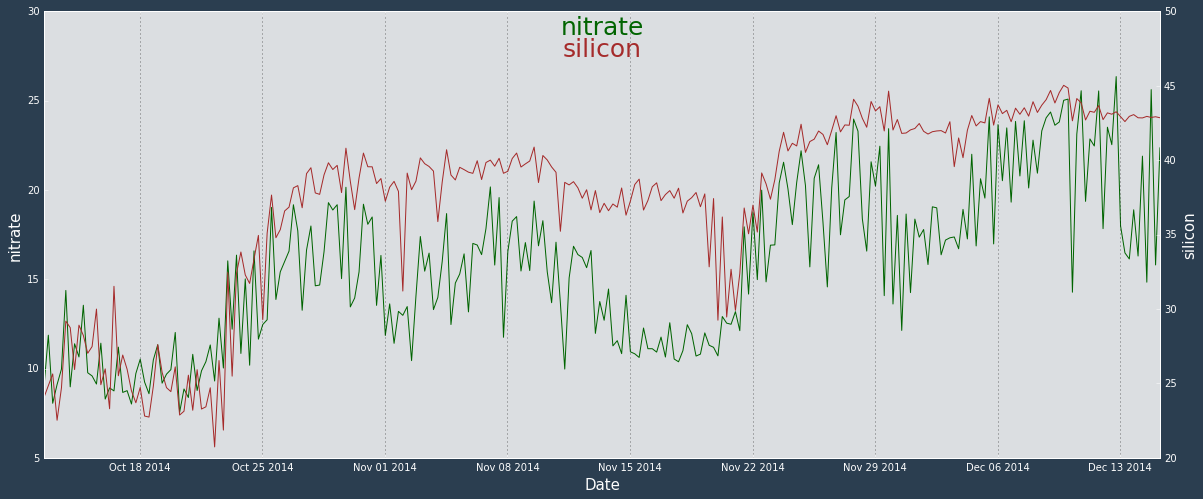

In [9]:
%%timeit -n1 -r1
reload(nowcast.figures.website_theme) # to reload website theme colours etc
fig = make_figure(xr_dataset, left_variable, right_variable, time_slice, place)